# Assignment 2 - Chapter 2

10/6/2023

Jaerock Kwon

## Import standard packages for RVC3

In [1]:
# standard imports
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *

In [3]:
R = rot2(0.5)

In [4]:
print(R)

[[  0.8776  -0.4794]
 [  0.4794   0.8776]]


Let's draw the rotational matrix


<Axes: xlabel='X', ylabel='Y'>

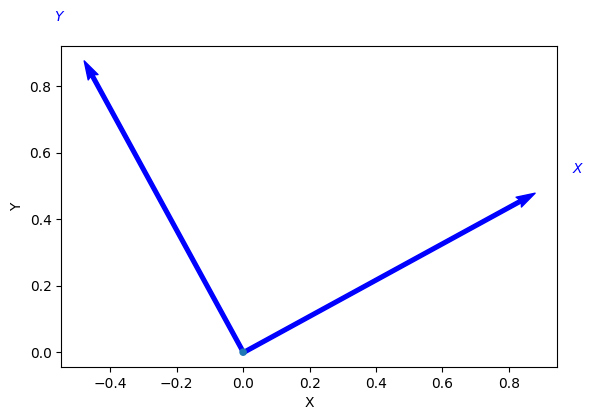

In [5]:
trplot2(R)

<Axes: xlabel='X', ylabel='Y'>

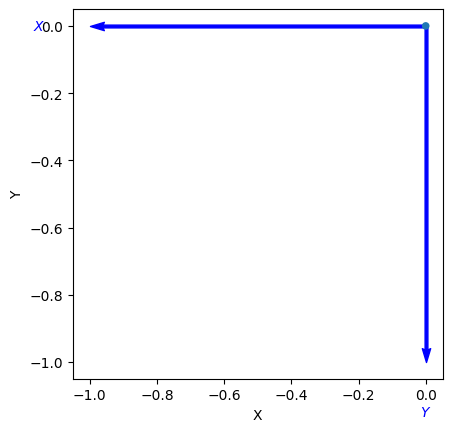

In [9]:
R = rot2(pi)
trplot2(R)

In [10]:
np.linalg.det(R)

1.0

In [11]:
R = rot2(pi/2)

In [12]:
np.linalg.det(R)

1.0

In [14]:
np.linalg.det(R @ R)

1.0

In [18]:
from sympy import Symbol, Matrix, simplify


In [19]:
theta = Symbol('theta')

In [21]:
R = Matrix(rot2(theta))

In [23]:
R * R

Matrix([
[-sin(theta)**2 + cos(theta)**2,       -2*sin(theta)*cos(theta)],
[       2*sin(theta)*cos(theta), -sin(theta)**2 + cos(theta)**2]])

In [24]:
simplify(R*R)

Matrix([
[cos(2*theta), -sin(2*theta)],
[sin(2*theta),  cos(2*theta)]])

In [25]:
import sympy

In [26]:
theta = sympy.Symbol('theta')

In [27]:
R = sympy.Matrix(rot2(theta))

In [28]:
R

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [30]:
R2 = R * R

In [31]:
sympy.simplify(R2)

Matrix([
[cos(2*theta), -sin(2*theta)],
[sin(2*theta),  cos(2*theta)]])

## homogeneuous transformation 

In [32]:
rot2(0.3)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [33]:
trot2(0.3)

array([[  0.9553,  -0.2955,        0],
       [  0.2955,   0.9553,        0],
       [       0,        0,        1]])

In [72]:
TA = trot2(30, 'deg', t=[1,2])

In [35]:
transl2(1,2)

array([[       1,        0,        1],
       [       0,        1,        2],
       [       0,        0,        1]])

In [36]:
transl2(1, 2) @ trot2(45, 'deg')

array([[  0.7071,  -0.7071,        1],
       [  0.7071,   0.7071,        2],
       [       0,        0,        1]])

In [44]:
TB = trot2(pi/2, t=[2,3])

<Axes: xlabel='X', ylabel='Y'>

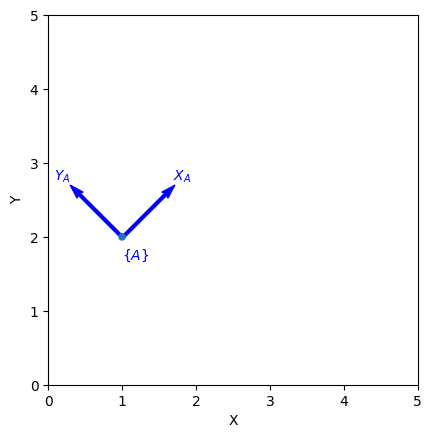

In [53]:
plotvol2([0, 5])
trplot2(TA, frame="A", color="b")
#trplot2(TB, frame="B", color="r")

<Axes: xlabel='X', ylabel='Y'>

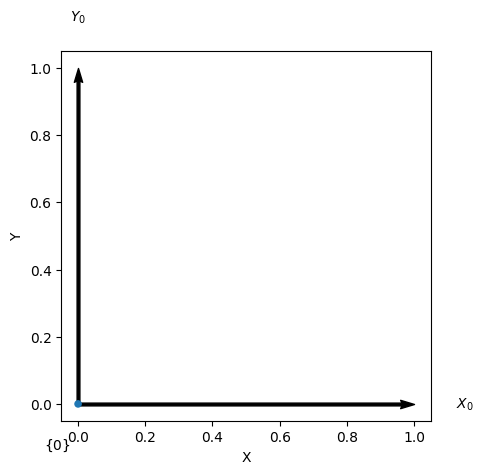

In [54]:
T0 = transl2(0, 0)
trplot2(T0, frame="0", color="k")

In [56]:
TB = transl2(2, 1)

<Axes: xlabel='X', ylabel='Y'>

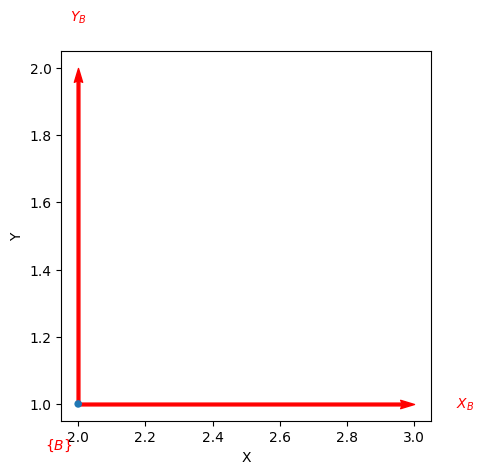

In [57]:
trplot2(TB, frame="B", color="r")

In [58]:
TAB = TA @ TB

In [59]:
TAB

array([[  0.7071,  -0.7071,    1.707],
       [  0.7071,   0.7071,    4.121],
       [       0,        0,        1]])

<Axes: xlabel='X', ylabel='Y'>

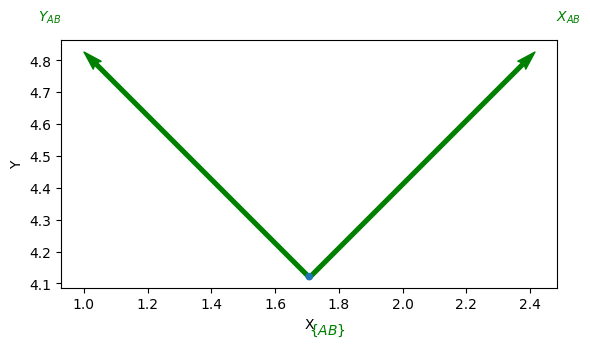

In [60]:
trplot2(TAB, frame="AB", color="g")

In [61]:
TBA = TB @ TA

<Axes: xlabel='X', ylabel='Y'>

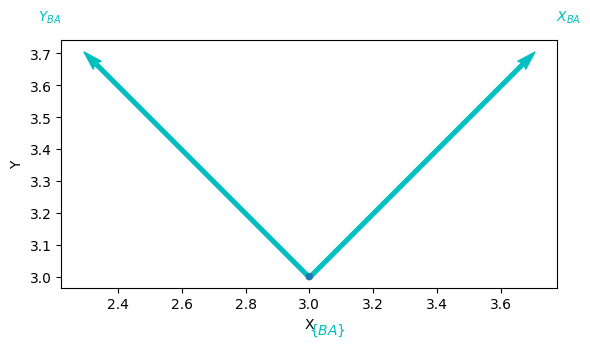

In [63]:
trplot2(TBA, frame="BA", color="c")

In [64]:
P = np.array([3,2])

[[<matplotlib.lines.Line2D at 0x7f55f6264160>], Text(3, 2, ' P')]

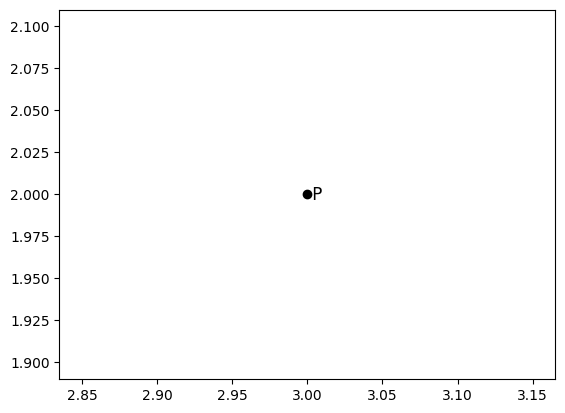

In [65]:
plot_point(P, "ko", text="P")

In [66]:
P

array([3, 2])

In [68]:
P_h = np.hstack([P, 1])

In [73]:
TA

array([[   0.866,     -0.5,        1],
       [     0.5,    0.866,        2],
       [       0,        0,        1]])

In [74]:
np.linalg.inv(TA) @ P_h

array([   1.732,       -1,        1])

In [75]:
e2h(P)

array([[       3],
       [       2],
       [       1]])

<Axes: xlabel='X', ylabel='Y'>

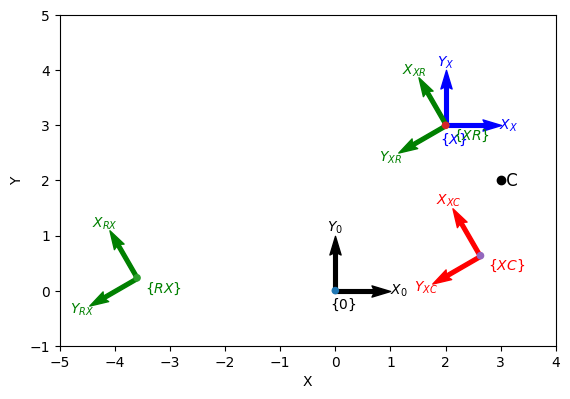

In [79]:
plotvol2([-5, 4, -1, 5])
T0 = transl2(0,0)
trplot2(T0, frame="0", color = "k")
TX = transl2(2, 3)
trplot2(TX, frame="X", color="b")
TR = trot2(120, 'deg')
trplot2(TR @ TX, frame = "RX", color="g")
trplot2(TX @ TR, frame = "XR", color="g")

C = np.array([3,2])
plot_point(C, "ko", text="C")

TC = transl2(C) @ TR @ transl2(-C)
trplot2(TC @ TX, frame="XC", color="r")

In [80]:
R = rotx(pi/2)

In [81]:
R

array([[       1,        0,        0],
       [       0,        0,       -1],
       [       0,        1,        0]])

In [82]:
p_b = np.array([1, 0, 1])

In [83]:
p_b = p_b.reshape(3,1)

In [84]:
p_b

array([[1],
       [0],
       [1]])

In [85]:
R @ p_b

array([[       1],
       [      -1],
       [       0]])

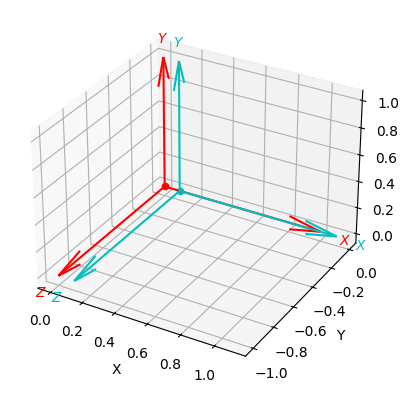

In [90]:
trplot(R, anaglyph=True)

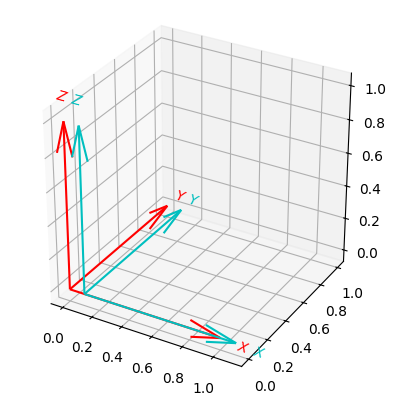

In [91]:
tranimate(R, anaglyph=True)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

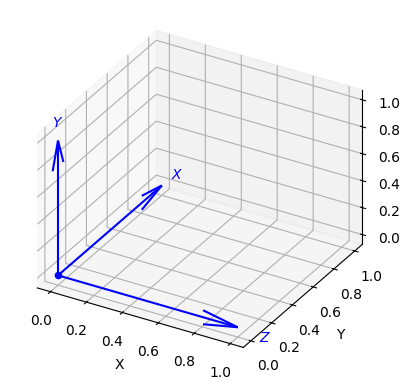

In [92]:
R = rotx(pi/2) @ roty(pi/2)
trplot(R)

In [93]:
R2 = roty(pi/2) @ rotx(pi/2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

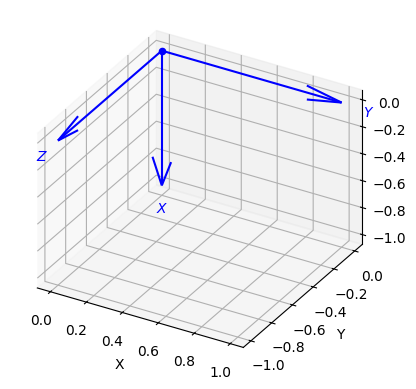

In [94]:
trplot(R2)

In [101]:
gamma = np.array([0.1, 0.2, 0.3])
R = rotz(gamma[0]) @ roty(gamma[1]) @ rotz(gamma[2])

In [102]:
R

array([[  0.9021,  -0.3836,   0.1977],
       [  0.3875,   0.9216,  0.01983],
       [ -0.1898,  0.05871,   0.9801]])

In [103]:
eul2r(0.1, 0.2, 0.3)

array([[  0.9021,  -0.3836,   0.1977],
       [  0.3875,   0.9216,  0.01983],
       [ -0.1898,  0.05871,   0.9801]])

In [104]:
R

array([[  0.9021,  -0.3836,   0.1977],
       [  0.3875,   0.9216,  0.01983],
       [ -0.1898,  0.05871,   0.9801]])

In [105]:
tr2eul(R)

array([     0.1,      0.2,      0.3])

In [106]:
rpy2r(0.1, 0.2, 0.3, order="zyx")

array([[  0.9363,  -0.2751,   0.2184],
       [  0.2896,   0.9564, -0.03696],
       [ -0.1987,  0.09784,   0.9752]])

In [108]:
!tripleangledemo

/home/jaerock/anaconda3/envs/rvc3/lib/python3.10/site-packages/rtbdata/data/spitfire_assy-gear_up.stl
Supermarine Spitfire Mk VIII by Ed Morley @GRABCAD
Gimbal models by Peter Corke using OpenSCAD
^C
Traceback (most recent call last):
  File "/home/jaerock/anaconda3/envs/rvc3/bin/tripleangledemo", line 8, in <module>
    sys.exit(main())
  File "/home/jaerock/anaconda3/envs/rvc3/lib/python3.10/site-packages/roboticstoolbox/examples/tripleangledemo.py", line 232, in main
    demo()
  File "/home/jaerock/anaconda3/envs/rvc3/lib/python3.10/site-packages/roboticstoolbox/examples/tripleangledemo.py", line 228, in demo
    env.step(0)
  File "/home/jaerock/anaconda3/envs/rvc3/lib/python3.10/site-packages/swift/Swift.py", line 221, in step
    self._step_shape(obj, dt)
  File "/home/jaerock/anaconda3/envs/rvc3/lib/python3.10/site-packages/swift/Swift.py", line 619, in _step_shape
    step_shape(
KeyboardInterrupt


chapter-2.ipynb
